In [1]:
import sys
sys.path.append(r'..\scripts')

import numpy as np

## Kernel

### Compute Kernel if not cached

In [12]:
from compute_kernels import parallel_Li, Li

In [17]:
#Define simulation parameters

N = 80 # Number of spatial points
zb, zt = 1, 5 #bounds
k = 2 #wave number
alpha = 4.8
dz = (zt - zb)/N

#Radius function
R = lambda z : 3 - 4.8 * ((z - .5 * (zb + zt))/(zt - zb))**2
R = np.vectorize(R)

if __name__ == '__main__':
    zg, oc, L = parallel_Li(zb, zt, N, k, R, num_workers = None)

In [18]:
np.savez(f'../data_cache/discretizationN={N}_k={k}_R=EandM.npz', zg=zg, oc=oc, L=L)

### Load Cached Kernel

In [2]:
#Define simulation parameters
N = 40 # Number of spatial points
zb, zt = 1, 5 #bounds
k = 2 #wave number|
alpha = 4.8
dz = (zt - zb)/N

#Radius function
R = lambda z : 3 - alpha*((z - 0.5 * (zb + zt))/(zt-zb))**2
R = np.vectorize(R)

discretization = np.load(f'../data_cache/discretizationN={N}_k={k}_R=EandM.npz')
zg, oc, Li = discretization['zg'], discretization['oc'], discretization['L']

## Forward Integration

In [3]:
from steady_state_analysis import compute_eta_decomp, dDelta_dt_from_Delta, inner_product, compute_dDelta_dt_from_range_Delta, generate_contours, build_LDelta
from dynamical_system import F_k, dDelta_dt, deta_dt
from simulation import generate_and_show_plots, simulate
import matplotlib.pyplot as plt

In [101]:
gamma = 1
S_hat =760
delta_hat =0.1
kappa = 200
Delta_E = np.vectorize(lambda z: 1)


In [102]:
delta_init = np.random.uniform(0, 1) * np.sin(2 * np.pi * zg / np.random.uniform(5, 20) + np.random.uniform(0, 2 * np.pi))

amplitude = np.random.uniform(0, 1)
wavelength = np.random.uniform(5, 20)  # Random wavelength
phase = np.random.uniform(0, 2 * np.pi)  # Random phase
eta_real_part = amplitude * np.sin(2 * np.pi * zg / wavelength + phase)
eta_imaginary_part = amplitude * np.cos(2 * np.pi * zg / wavelength + phase)
eta_init = eta_real_part + 1j * eta_imaginary_part

In [104]:
#Load Values
#eigenvalues, eigenvectors = np.linalg.eig(build_LDelta(np.ones(N), Li * dz, oc * dz))
Delta0_func = delta_init #lambda z : 1 #eigenvalues[1] * eigenvectors[:, 1] #
eta0_func =  eta_init #eigenvectors[:, 1] + 0 * 1j#compute_eta_decomp(Delta0_func, Li, oc, S_hat, delta_hat, F_k, R, zg, k, num_eigenvalues = N)[0] #lambda z : 0 + 0j

generate_plots = True
save = False
T_final = 15
try: 
    steady_states = np.load(f'../data_cache/steady_state_N={N}_S_hat={S_hat}_delta_hat={delta_hat}_kappa={kappa}_gamma={gamma}.npz')
    zg, sol_Delta, sol_eta = steady_states['zg'], steady_states['sol_Delta'], steady_states['sol_eta']
except FileNotFoundError:
    if generate_plots:
        sol_Delta, sol_eta = generate_and_show_plots(kappa, gamma, S_hat, delta_hat, Delta0_func, eta0_func, Delta_E, R, k, zb, zt, N, T_final, Li, oc, zg, solver='RK45', levels = 30)
    else:
        sol_Delta, sol_eta = simulate(kappa, gamma, S_hat, delta_hat, Delta0_func, eta0_func, Delta_E, R, k, zb, zt, N, T_final, Li, oc, zg, solver='RK45')

    if save:
        np.savez(f'../data_cache/steady_state_N={N}_S_hat={S_hat}_delta_hat={delta_hat}_kappa={kappa}_gamma={gamma}.npz', zg = zg, sol_Delta = sol_Delta, sol_eta = sol_eta)

In [65]:
old_delta_init = delta_init

In [66]:
old_eta_init = eta_init

In [29]:
sol_Delta[:, -1]

array([0.6147916 -2.57465177e-17j, 0.59155363-1.83590222e-17j,
       0.57931897+4.41873450e-18j, 0.57016334-3.41135789e-17j,
       0.56272718-9.11657939e-17j, 0.55663842+4.01817945e-17j,
       0.55181059-1.65921235e-16j, 0.54832013-6.55030232e-17j,
       0.54634576+4.06156763e-17j, 0.54609616+3.22967618e-17j,
       0.54773971+5.20100153e-17j, 0.55135805+6.71258103e-17j,
       0.55693138-9.48799042e-17j, 0.56434942+2.69688212e-17j,
       0.57343659-3.21420697e-17j, 0.58398055-8.12154888e-18j,
       0.59575709-5.84279990e-17j, 0.60854837-4.72502065e-17j,
       0.6221541 +4.50737343e-18j, 0.63639607-8.26831042e-18j,
       0.65105331-7.35832451e-17j, 0.66614809-6.00712580e-18j,
       0.68149799+4.93420746e-18j, 0.6970079 +3.58548528e-17j,
       0.71259738-2.63639559e-17j, 0.72819647-3.09140396e-18j,
       0.74374269+4.52418439e-17j, 0.75917857-2.58461289e-17j,
       0.77444963+2.14311075e-18j, 0.78950262+2.53652901e-18j,
       0.80428412-3.37089328e-18j, 0.81873946+3.5773583

## Iteration

In [6]:
from steady_state_analysis import compute_eta_decomp, dDelta_dt_from_Delta, inner_product, compute_dDelta_dt_from_range_Delta, generate_contours
from dynamical_system import F_k, dDelta_dt, deta_dt
from simulation import generate_and_show_plots, simulate
import matplotlib.pyplot as plt
from scipy.linalg import eig

In [7]:
gamma = 1
S_hat = 1
delta_hat = 0.085
kappa = 5
Delta_E = np.vectorize(lambda z: 1)

Delta0 = np.ones(N)

In [8]:
Delta0 =  np.ones(N) * 1
Delta = Delta0
Deltas = [Delta0]
dDeltas = []
etas = []
for i in range(1):
    eta, A_ns, eigenvalues, eigenvectors = compute_eta_decomp(Delta, Li, oc, S_hat, delta_hat, F_k, R, zg, k, num_eigenvalues = N)
    dDelta = dDelta_dt(Delta, eta, Delta_E(zg), gamma, kappa)
    Delta = dDelta + Delta
    dDeltas.append(dDelta)
    Deltas.append(Delta)
    etas.append(eta)
    if np.min(Delta) < 0:
        print('Delta negative, no solution')
        #break
    if np.sum(np.abs(dDelta))/N < 0.001:
        print('dDelta close to 0')
        #break

Delta negative, no solution


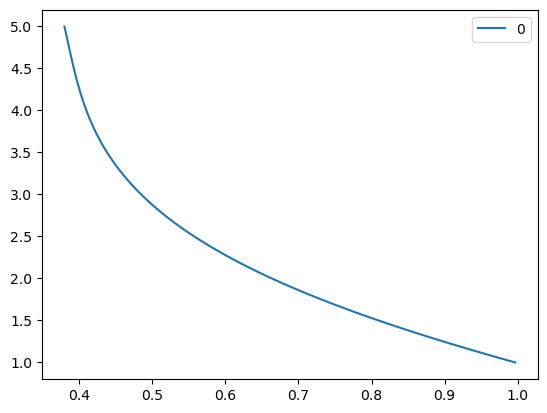

In [126]:
for i, eta in enumerate(etas):
    plt.plot(np.abs(eta), zg, label=str(i))
    plt.legend()

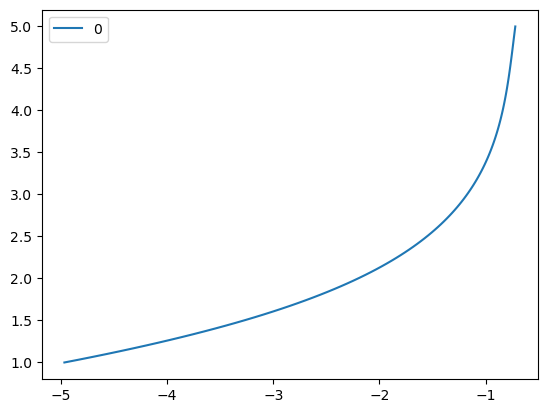

In [127]:
for i, dDelta in enumerate(dDeltas):
    plt.plot(dDelta, zg, label=str(i))
    plt.legend()

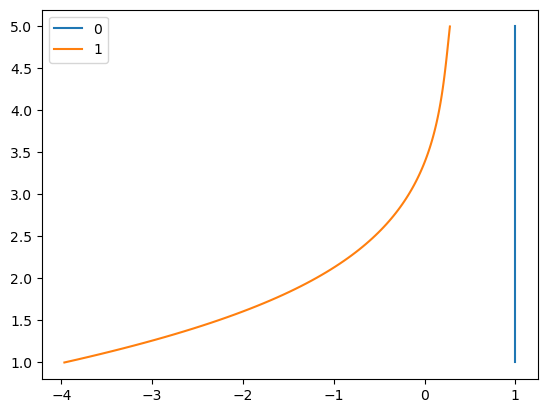

In [128]:
for i, Delta in enumerate(Deltas):
    plt.plot(Delta, zg, label=str(i))
    plt.legend()

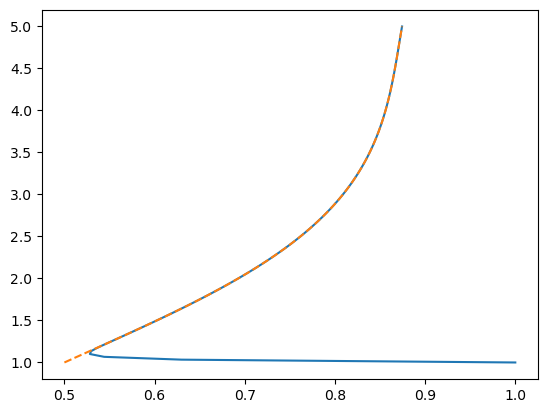

In [116]:
plt.plot(Deltas[-1].real, zg)
plt.plot(1/(1 + (1j* np.vectorize(F_k)(R, zg, k)/max(np.vectorize(F_k)(R, zg, k)))*np.conj(1j * np.vectorize(F_k)(R, zg, k)/max(np.vectorize(F_k)(R, zg, k)))), zg, '--')

In [ ]:
#what is this

z = (zg[1] - zg[0])
L_matrix = Li * dz
omega_c_matrix = np.diag(oc @ np.ones(N) * dz)
base_eigenvalues, base_eigenvectors = np.linalg.eig(L_matrix - omega_c_matrix)
eta_approx = np.zeros(N)
for i in range(N):
    for j in range(N):
        eta_approx += inner_product(np.vectorize(F_k)(R, zg, k), base_eigenvectors[:, i], R, np.ones(N), zg) * inner_product(np.vectorize(F_k)(R, zg, k), base_eigenvectors[:, j], R, np.ones(N), zg) * base_eigenvectors[:, i]*base_eigenvectors[:, j]

## Branch Continuation

In [97]:
from multibranch_param_continuation import Branch, Solution, multiple_branch_continuation_2D

In [98]:
Delta_init = np.ones(N) * sol_Delta[:, -1].real
eta_init = sol_eta[:, -1]

initial_Delta = Solution(np.concatenate([Delta_init, eta_init.real, eta_init.imag, [S_hat, kappa]]))
initial_branch = Branch(0, initial_Delta)

Delta_E = np.vectorize(lambda z: 1)(zg)
F_k_vector = np.vectorize(F_k)(R, zg, k)
T_k_integrable = Li * dz
T_1_integrable = oc * dz

params = {'hat_Sk': 200, 'kappa': 10, 'hat_delta': 0.05, 'gamma': 1, 'T_k': T_k_integrable, 'T_1': T_1_integrable, 'F_k': F_k_vector, 'Delta_E': Delta_E, 'N': N}

In [99]:
test_continuation = multiple_branch_continuation_2D(
    [initial_branch],
    0,
    0,
    1,
    params,
    n_starts=20, 
    sweep_range = None,
    tol_new=1e-6,
    solver_tol = 1e-10
)

===== 2D Continuation step 1 =====
0 solutions found
[Branch 0] no solutions => fold or no surface here.


In [9]:
ordered_sol = sorted(list(test_continuation[0].solutions), key=lambda x: x.alpha1)
ordered_sol_2 = sorted(list(test_continuation[1].solutions), key=lambda x: x.alpha1)

IndexError: list index out of range

c:\Users\MikeTyrrell\miniconda3\envs\personal\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\MikeTyrrell\miniconda3\envs\personal\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


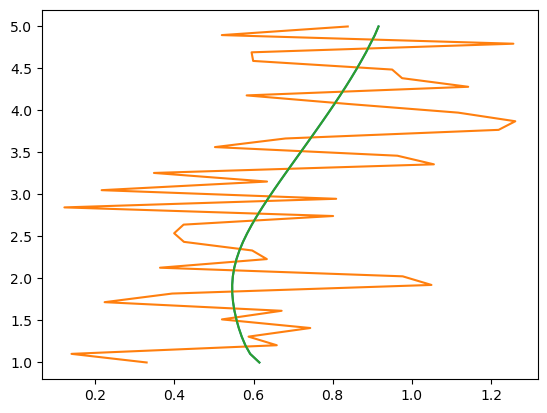

In [ ]:
plt.plot(np.split(ordered_sol[0].y, 3)[0], zg)
plt.plot(np.split(ordered_sol_2[0].y, 3)[0], zg)
plt.plot(sol_Delta[:, -1], zg)

## Bifurcation Searching

### Search for multiple soluutions

In [6]:
from steady_state_analysis import optimization_wrapper, compute_eta_decomp
from dynamical_system import F_k, dDelta_dt

In [7]:
#gamma = 1
#S_hat = 1
#delta_hat = 0.085
#kappa = 5
Delta_E = np.vectorize(lambda z: 1)(zg)

Delta0 = sol_Delta[:, -1] #np.ones(N)

F_k_vector = np.vectorize(F_k)(R, zg, k)

init_params = np.concatenate([Delta0, [S_hat, delta_hat, kappa]])

In [8]:
res, null_space = optimization_wrapper(init_params, Li, oc, F_k_vector, R, zg, k, Delta_E, num_eigenvalues=None)

c:\Users\MikeTyrrell\miniconda3\envs\personal\Lib\site-packages\scipy\_lib\array_api_compat\common\_aliases.py:235: ComplexWarning: Casting complex values to real discards the imaginary part
  return x.astype(dtype=dtype, copy=copy)
c:\Users\MikeTyrrell\miniconda3\envs\personal\Lib\site-packages\scipy\optimize\_numdiff.py:612: ComplexWarning: Casting complex values to real discards the imaginary part
  J_transposed[i] = df / dx
c:\Users\MikeTyrrell\miniconda3\envs\personal\Lib\site-packages\scipy\optimize\_slsqp_py.py:431: ComplexWarning: Casting complex values to real discards the imaginary part
  slsqp(m, meq, x, xl, xu, fx, c, g, a, acc, majiter, mode, w, jw,
c:\Users\MikeTyrrell\Python Projects\SSWs\notebooks\..\scripts\steady_state_analysis.py:376: SyntaxWarning: invalid escape sequence '\D'
  """


KeyboardInterrupt: 

In [ ]:
null_space

array([[0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.09128709],
       [0.091

In [10]:
eta, _, eigenvalues, eigenvectors = compute_eta_decomp(res.x[:-3], Li, oc, S_hat, delta_hat, 
                                          F_k_vector, R, zg, 
                                          k)

dDelta = dDelta_dt(res.x[:-3], eta, Delta_E, 1, kappa)

eigenvalues

array([-8.52100735e-17, -9.74934537e-02, -9.71866031e-02, -9.68523256e-02,
       -9.64904431e-02, -9.61009128e-02, -9.56838341e-02, -9.52394564e-02,
       -9.47681053e-02, -9.42701327e-02, -9.37462913e-02, -9.31973183e-02,
       -9.26212710e-02, -9.20126990e-02, -9.13673291e-02, -9.06859241e-02,
       -8.99729636e-02, -8.92338943e-02, -8.84736803e-02, -8.76964401e-02,
       -8.69055018e-02, -8.61035509e-02, -8.52927679e-02, -8.44749383e-02,
       -8.36515361e-02, -1.46705035e-02, -8.28237861e-02, -8.19927122e-02,
       -8.11591748e-02, -8.03238998e-02, -7.94875023e-02, -7.86505054e-02,
       -7.78133551e-02, -7.69764338e-02, -7.61400706e-02, -7.53045495e-02,
       -7.44701174e-02, -7.36369902e-02, -7.28053582e-02, -7.19753900e-02,
       -7.11472372e-02, -7.03210369e-02, -6.94969149e-02, -6.86749884e-02,
       -6.78553674e-02, -6.70381571e-02, -6.62234592e-02, -6.54113735e-02,
       -6.46019990e-02, -1.84027435e-02, -6.37954347e-02, -6.29917811e-02,
       -6.21911404e-02, -

### Other

In [10]:
from steady_state_analysis import parameter_continuation_with_bifurcations, plot_continuation_results, \
    parameter_continuation_with_bifurcations_2d, plot_continuation_results_2d, parameter_continuation_with_bifurcation_full, \
parameter_continuation_with_bifurcation_full_2d, parameter_continuation_with_bifurcation_coefficients_space, plot_continuation_results_2d_coefs
from dynamical_system import F_k
import matplotlib.pyplot as plt

In [7]:
Delta_E = np.vectorize(lambda z: 1)(zg)
Delta_init = np.ones(N) * sol_Delta[:, -1].real
eta_init = sol_eta[:, -1]
F_k_vector = np.vectorize(F_k)(R, zg, k)
T_k_integrable = Li * dz
T_1_integrable = oc * dz

In [8]:
params = {'hat_Sk': 200, 'kappa': 10, 'hat_delta': 0.05, 'gamma': 1, 'T_k': T_k_integrable, 'T_1': T_1_integrable, 'F_k': F_k_vector, 'Delta_E': Delta_E}
S_hat_vals = np.logspace(np.log10(0.1), np.log10(500),50)
delta_hat_vals = np.logspace(np.log10(0.001), np.log10(0.8), 80)
kappa_vals = np.linspace(1, 50, 50)


### Decoupled

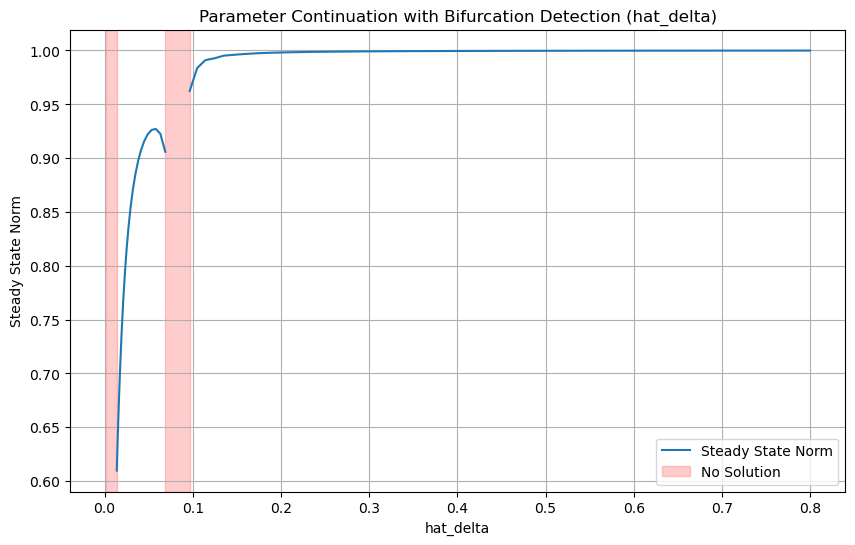

In [24]:
bifurcation_map = parameter_continuation_with_bifurcations(Delta_init, params, 'hat_delta', delta_hat_vals, T_k_integrable, T_1_integrable, F_k_vector, Delta_E, tol=1e-8)
plot_continuation_results(delta_hat_vals, bifurcation_map, 'hat_delta')

In [61]:
bifurcation_map_2d = parameter_continuation_with_bifurcations_2d(Delta_init, params, 'kappa', kappa_vals, 'hat_Sk', S_hat_vals, T_k_integrable, T_1_integrable, F_k_vector, Delta_E, tol=1e-8)

c:\Users\MikeTyrrell\Python Projects\SSWs\notebooks\..\scripts\steady_state_analysis.py:639: ComplexWarning: Casting complex values to real discards the imaginary part
  J[:, i] = (R_perturbed - R) / epsilon


c:\Users\MikeTyrrell\Python Projects\SSWs\notebooks\..\scripts\steady_state_analysis.py:846: ComplexWarning: Casting complex values to real discards the imaginary part
  steady_state_norms[i, j] = np.mean(Delta_sol)


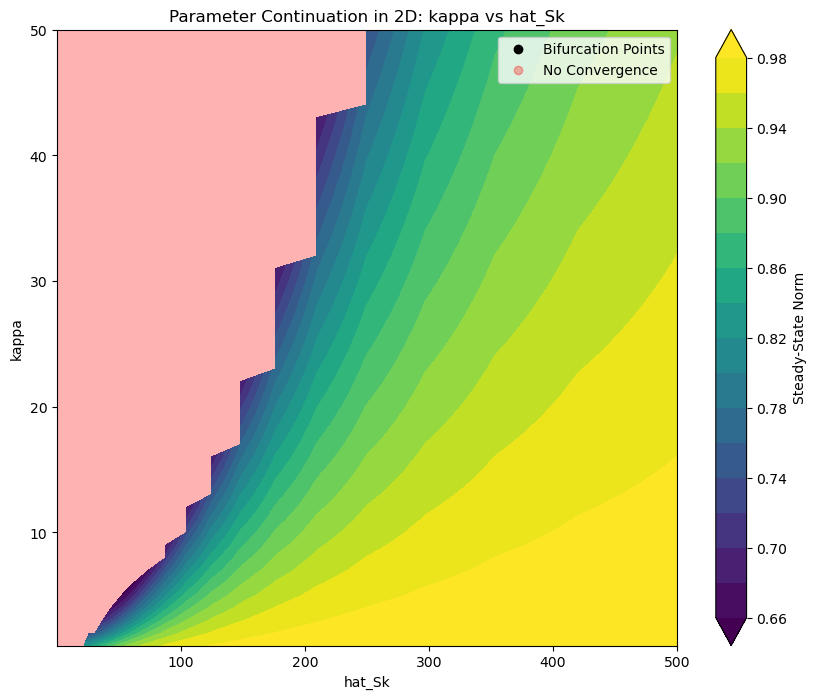

In [62]:
plot_continuation_results_2d(kappa_vals, S_hat_vals, bifurcation_map_2d, 'kappa', 'hat_Sk')

### Coupled

In [ ]:
bifurcation_map = parameter_continuation_with_bifurcation_full(np.concatenate([Delta_init, eta_init.real, eta_init.imag]), params, 'hat_delta', (0, 0.8), step_size=0.01)

param_vals = [param_val[0] for param_val in bifurcation_map]
Delta_vals = [param_val[1][:N] if param_val[1] is not None else None for param_val in bifurcation_map]

Delta_only_bifucation_map = [(param_vals[i], Delta_vals[i], bifurcation_map[i][2]) for i in range(len(bifurcation_map))]

plot_continuation_results(param_vals, Delta_only_bifucation_map, 'hat_delta')

In [31]:
bifurcation_map_2d = parameter_continuation_with_bifurcation_full_2d(np.concatenate([Delta_init, eta_init.real, eta_init.imag]), params, 'hat_delta', (0, 0.4), 0.01, 'hat_Sk', (1, 500), 20, tolerance=1e-8)

Continuation failed at (0.01, 101): The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
Continuation failed at (0.02, 61): The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
Continuation failed at (0.03, 41): The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
Continuation failed at (0.03, 81): The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
Continuation failed at (0.04, 61): The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
Continuation failed at (0.05, 81): The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
Continuation failed at (0.05, 181): The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evalua

In [32]:
param_1_vals = np.sort(list(set([param[0] for param in bifurcation_map_2d.keys()])))
param_2_vals = np.sort(list(set([param[1] for param in bifurcation_map_2d.keys()])))

bifurcation_map_2d_Delta = {
    (param1, param2): (solution[:N], bool1, bool2) if solution is not None else (None, bool1, bool2)
    for (param1, param2), (solution, bool1, bool2) in bifurcation_map_2d.items()
}


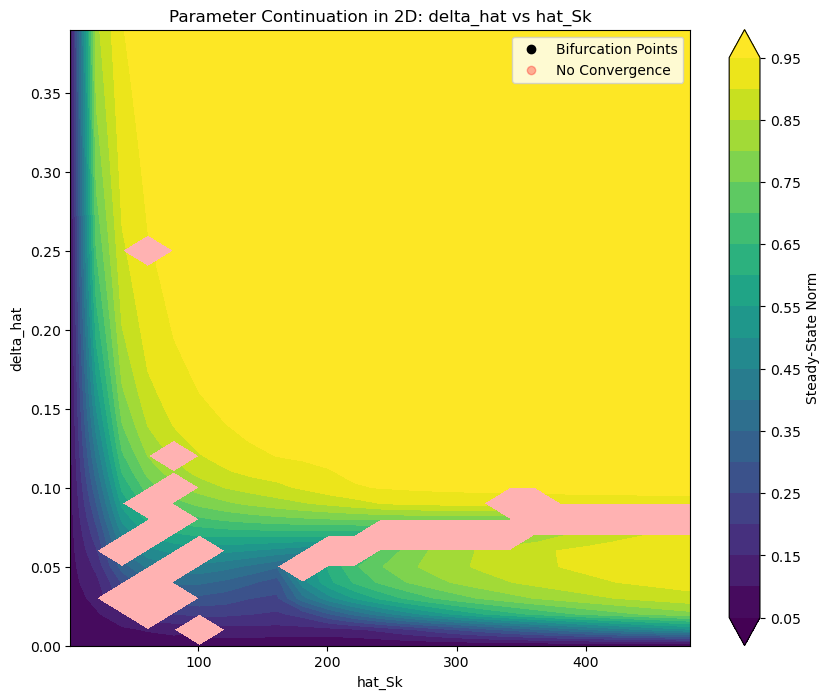

In [33]:
plot_continuation_results_2d(param_1_vals, param_2_vals, bifurcation_map_2d_Delta, 'delta_hat', 'hat_Sk')

### Eigenfunction Expansion

In [9]:
bifurcation_map_eigenfunctions =  parameter_continuation_with_bifurcation_coefficients_space(np.concatenate([Delta_init, eta_init]), params, 'hat_delta', (0, 0.4), 0.05, 'hat_Sk', (1, 100), 20, np.vectorize(R)(zg), zg, tolerance=1e-8)

c:\Users\MikeTyrrell\Python Projects\SSWs\notebooks\..\scripts\dynamical_system.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  eta.real = eta_real
c:\Users\MikeTyrrell\Python Projects\SSWs\notebooks\..\scripts\dynamical_system.py:160: ComplexWarning: Casting complex values to real discards the imaginary part
  eta.imag = eta_imag


Continuation failed at (0.15000000000000002, 81): The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
Continuation failed at (0.2, 61): The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
Continuation failed at (0.2, 81): The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.


In [13]:
param_1_vals = np.sort(list(set([param[0] for param in bifurcation_map_eigenfunctions.keys()])))
param_2_vals = np.sort(list(set([param[1] for param in bifurcation_map_eigenfunctions.keys()])))

bifurcation_map_2d_eig_Delta = {
    (param1, param2): (solution[:N], bool1, bool2) if solution is not None else (None, bool1, bool2)
    for (param1, param2), (solution, bool1, bool2) in bifurcation_map_eigenfunctions.items()
}


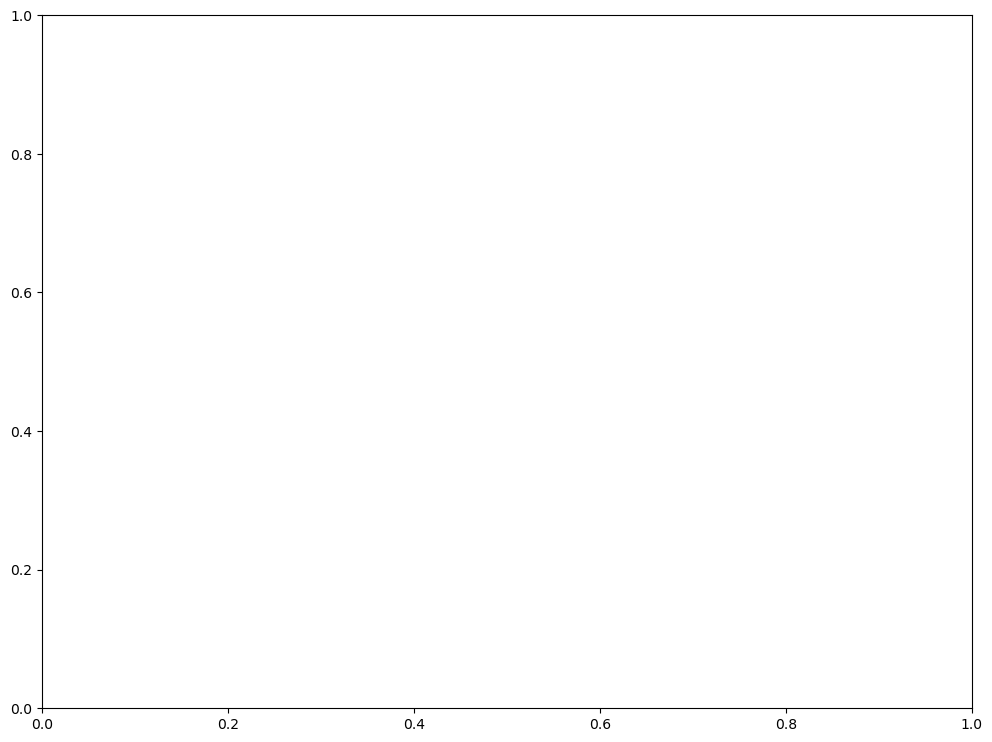

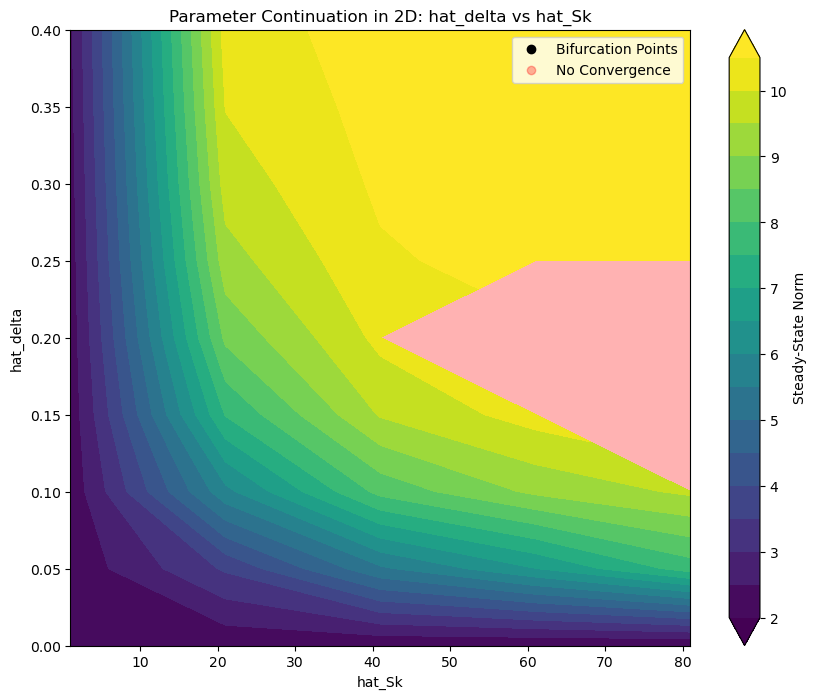

In [37]:
plot_continuation_results_2d_coefs(param_1_vals, param_2_vals, bifurcation_map_2d_eig_Delta, 'hat_delta', 'hat_Sk', eigenfunc_indices = [0])

## Compute Steady States Old

In [ ]:
from steady_state_analysis import compute_adomian_decomp_terms, pseudo_arclength_continutation, compute_steady_state
from simulation import simulate
from dynamical_system import F_k
import matplotlib.pyplot as plt

### Pseudo-Arclength

In [ ]:
#Default Parameters
T_final = 300
gamma = 0.1
S_hat = 100
delta_hat = 0.1
kappa = 30
Delta0_func = lambda z : 1
eta0_func = lambda z : 1 + 0j
Delta_E = np.vectorize(lambda z : 0.5)

sol_T, sol_Delta, sol_eta = simulate(kappa, gamma, S_hat, delta_hat, Delta0_func, eta0_func, Delta_E, R, k, zb, zt, N, T_final, Li, oc, solver='BDF')

In [ ]:
#Initial guess for state variable is 
z0 = np.concatenate([sol_Delta[:, -1], sol_eta[:, -1]]) # Initial guess for state variables
lambda0 = np.array([100])  # Initial guess for parameter vector (3 components)
zlambd0 = np.concatenate([z0, lambda0])

# Parameters for continuation
s0 = 0.0  # Initial arclength
ds = 2  # Arclength increment
num_steps = 100  # Number of continuation steps

dz = (zt - zb)/N

function_params = (L, oc, Delta_E(zg), F_k(R, zg, k)) #gamma, L, oc, DeltaE, Fk, N, dz 

# Perform continuation
results, convergence = pseudo_arclength_continuation(zlambd0, function_params, N, dz, ds, S_hat = S_hat, delta_hat = delta_hat, kappa = kappa, gamma=gamma, max_steps=num_steps, jac_epislon=1e-8)

np.savez(f'SteadyStatesVaringKappaPseudoArc.npz', results = results, convergence=convergence) 

results


## Visual Investigation

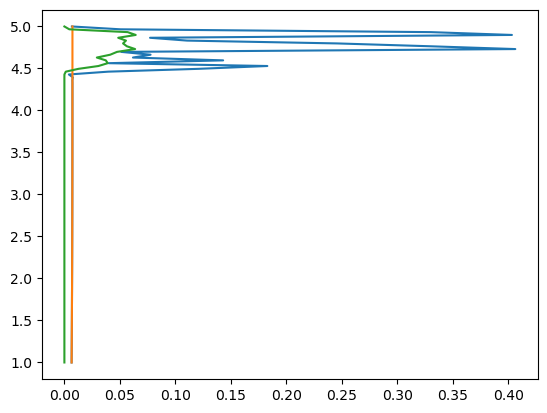

In [ ]:
#compute single \eta 
Delta = sol_Delta[:, -1]
#Delta = vecced_delta[95]
eta, A_ns, eigenvalues, eigenvectors = compute_eta_decomp(Delta, Li, oc, S_hat, delta_hat, F_k, R, zg, k, num_eigenvalues = N)

plt.plot(np.abs(sol_eta[:, -1]), zg)
plt.plot(np.abs(eta), zg)

plt.plot(dDelta_dt_from_Delta(Delta, Delta_E, S_hat, delta_hat, gamma, kappa, Li, oc, F_k, R, zg, k, num_eigenvalues = N)[0], zg)

In [ ]:
delta_hat = 0.01

In [ ]:
#Compute resonant eigenvalue
neg_resonant_value = -delta_hat - np.sqrt(delta_hat - delta_hat**2 - S_hat**(-2))
pos_resonant_value = -delta_hat + np.sqrt(delta_hat - delta_hat**2 - S_hat**(-2))

print(-np.min(oc @ Delta * dz))

print(pos_resonant_value)

print(neg_resonant_value)

np.argmin(np.abs(eigenvalues - neg_resonant_value))

-0.15071069897441416
0.0894987437106615
-0.10949874371066148


In [ ]:
#multiple Deltas
#Delta = lambda b: np.exp(1j * b * zg).imag * 0 + b
#b_grid = np.linspace(0, 1, 100)
#vecced_delta = np.array([Delta(b) for b in b_grid])

x_axis_level = N//2
Delta = sol_Delta[:, -1]
b_grid = np.linspace(0, 1/Delta[x_axis_level], 100)
#b_grid = np.linspace(-1, 1, 100)
vecced_delta = np.array([Delta * b for b in b_grid])
#vecced_delta = np.where(vecced_delta >= 0, vecced_delta, 0)
#vecced_delta = np.where(vecced_delta <= 1, vecced_delta, 1)

dDelta_all, eigenvalues_all, eigenvectors_all =  compute_dDelta_dt_from_range_Delta(vecced_delta, Delta_E, S_hat, delta_hat, gamma, kappa, Li, oc, F_k, R, zg, k, num_eigenvalues = N)

c:\Users\MikeTyrrell\Python Projects\SSWs\notebooks\..\scripts\steady_state_analysis.py:261: RuntimeWarning: divide by zero encountered in divide
  eigenvectors[:, i] /= norm  # Normalize the eigenvector
c:\Users\MikeTyrrell\Python Projects\SSWs\notebooks\..\scripts\steady_state_analysis.py:261: RuntimeWarning: invalid value encountered in divide
  eigenvectors[:, i] /= norm  # Normalize the eigenvector
c:\Users\MikeTyrrell\Python Projects\SSWs\notebooks\..\scripts\steady_state_analysis.py:213: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.exp(-zg) * R**2 * Delta * f * np.conj(g) * dz)


In [ ]:
Delta = np.ones(N)
L_matrix = Li * Delta * dz
omega_c_matrix = np.diag(oc @ Delta * dz)
base_eigenvalues, base_eigenvectors = np.linalg.eig(L_matrix - omega_c_matrix)

In [ ]:
Delta_sigmoid = lambda b: 1/(1 + np.exp(-b * zg)) 
Delta_sin = lambda b: np.exp(1j * b * zg).imag 
b_grid = np.linspace(0, 1, 10)
vecced_delta = np.concatenate([[np.ones(N)], np.array([Delta_sigmoid(b) for b in b_grid]), np.array([Delta_sin(b) for b in b_grid])])

eigenvalues_list = []
eigenvectors_list = []
spectrum_boundary = []
for i in range(vecced_delta.shape[0]):
    Delta = vecced_delta[i]
    L_matrix = Li * Delta * dz
    omega_c_matrix = np.diag(oc @ Delta * dz)
    eigenvalues, eigenvectors = np.linalg.eig(L_matrix - omega_c_matrix)
    eigenvalues_list.append(eigenvalues)
    eigenvectors_list.append(eigenvectors)
    spectrum_boundary.append(np.min(oc @ Delta * dz))

eigenvalues_arr = np.array(eigenvalues_list)
eigenvectors_arr = np.array(eigenvectors_list)
spectrum_boundary = np.array(spectrum_boundary)

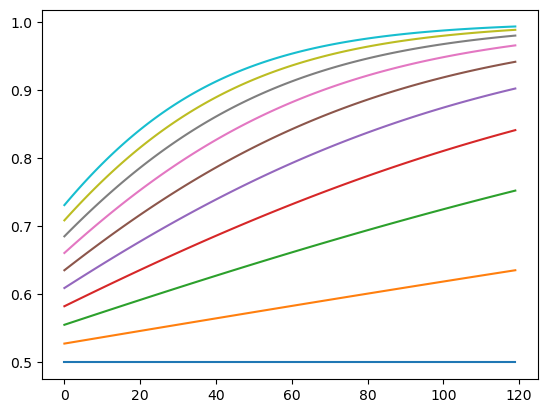

In [ ]:
for b in b_grid:
    plt.plot(Delta_sigmoid(b))

In [ ]:
np.sign(eigenvectors_arr[0, 0, 2].real)

1.0

c:\Users\MikeTyrrell\miniconda3\envs\'personal'\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\MikeTyrrell\miniconda3\envs\'personal'\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


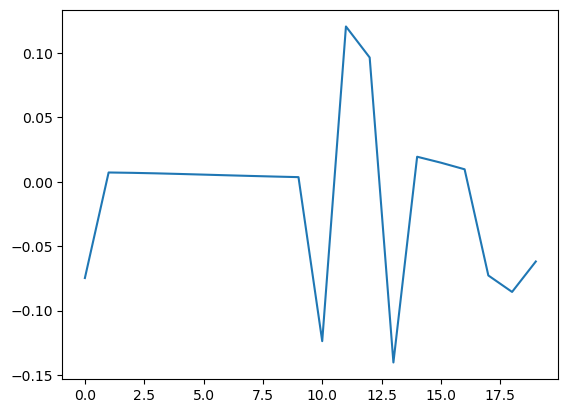

In [ ]:
plt.plot([eigenvalues_arr[i-1, 4] - eigenvalues_arr[i, 4] for i in range(1, len(vecced_delta))])

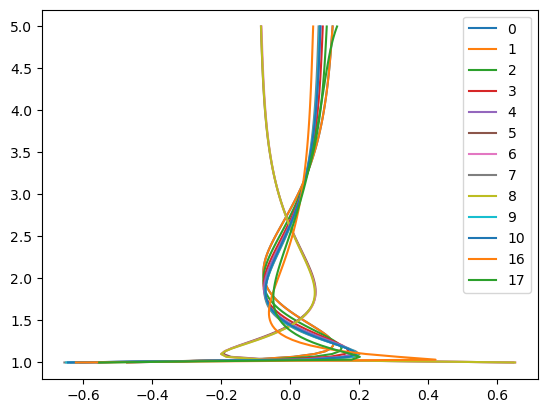

In [ ]:
eigenvector_to_plot = 3
for i in range(len(vecced_delta)):
    discrete = -eigenvalues_arr[i, eigenvector_to_plot] < spectrum_boundary[i]
    if (discrete or (i == 0)):
        plt.plot(eigenvectors_arr[i, :, eigenvector_to_plot].real, zg, label=str(i))
    plt.legend()

c:\Users\MikeTyrrell\miniconda3\envs\'personal'\Lib\site-packages\matplotlib\contour.py:1531: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.asarray(x, dtype=np.float64)
c:\Users\MikeTyrrell\miniconda3\envs\'personal'\Lib\site-packages\matplotlib\contour.py:1515: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
c:\Users\MikeTyrrell\miniconda3\envs\'personal'\Lib\site-packages\matplotlib\contour.py:1516: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
c:\Users\MikeTyrrell\miniconda3\envs\'personal'\Lib\site-packages\matplotlib\contour.py:1181: ComplexWarning: Casting complex values to real discards the imaginary part
  self.levels = np.asarray(levels_arg, np.float64)
c:\Users\MikeTyrrell\miniconda3\envs\'personal'\Lib\site-packages\numpy\ma\core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part

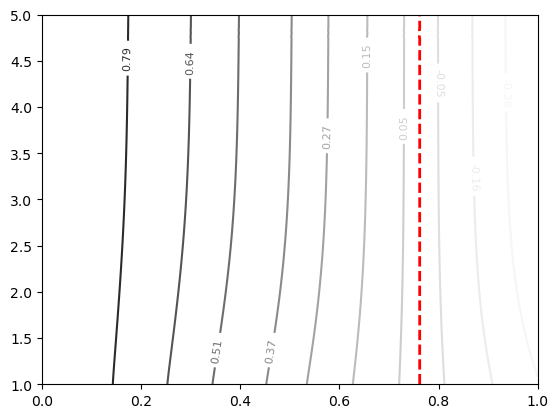

In [ ]:
generate_contours(dDelta_all, np.array(vecced_delta), zg, x_axis_level, min_spacing = .1)

In [ ]:
# Flatten the sliced array and get indices of the smallest 5 values
arr = np.abs(eigenvalues - delta_hat - 1/S_hat)
flat_indices = np.argsort(arr, axis=None)[:10]

# Convert the flat indices back to coordinates in the original array
top_min_indices = [np.unravel_index(idx, arr.shape) for idx in flat_indices]

# Adjust indices to account for the slice
#top_min_indices = [(i + 0, j + 0) for i, j in top_min_indices]

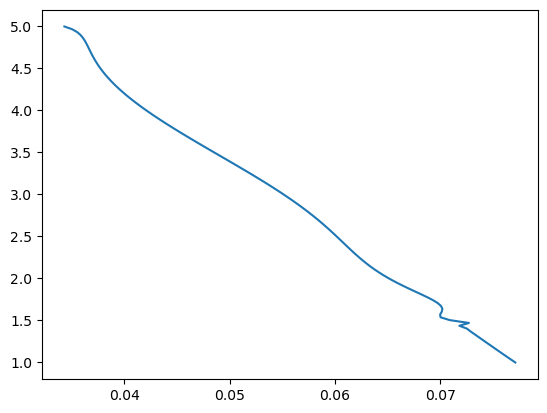

In [ ]:
plt.plot(np.abs(np.sum(-A_ns[top_min_indices] * eigenvectors[:, top_min_indices], axis=1)), zg)

In [ ]:
np.abs(eigenvalues_all[63] - delta_hat - 1/S_hat).argmin()

0

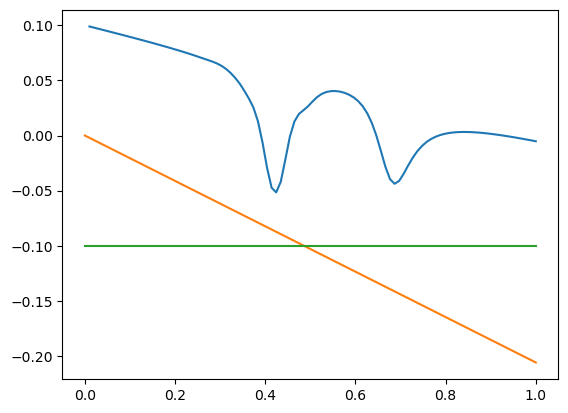

In [ ]:
plt.plot(vecced_delta[:, N//2], dDelta_all[:, N//2])
plt.plot(vecced_delta[:, N//2], eigenvalues_all[:, 1])
plt.plot(vecced_delta[:, N//2], np.ones(100) * -delta_hat)

In [ ]:
def compute_interaction(eigenvalue_1, eigenvalue_2):
    #return ((eigenvalue_1 + delta_hat) - 1/(1j * S_hat)) * np.conj((eigenvalue_2 + delta_hat) - 1/(1j * S_hat))
    return (eigenvalue_1 + delta_hat) * (eigenvalue_2 + delta_hat) + 1/(S_hat)**2 - 1j/S_hat*(eigenvalue_2 + delta_hat) + 1j/S_hat*(eigenvalue_1 + delta_hat) #these interaction terms actually cancel since we have double but with eigenvealues flipped, if this makes sense

In [ ]:
Fk = np.vectorize(F_k)(R, zg, k)
def one_term(arr_idx, idx_1, idx_2):
    eigenvalue_1 = eigenvalues_all[arr_idx][idx_1]
    eigenvalue_2 = eigenvalues_all[arr_idx][idx_2]
    eigenvector_1= eigenvectors_all[arr_idx][:, idx_1]
    eigenvector_2 = eigenvectors_all[arr_idx][:, idx_2]
    inner_prod = inner_product(1j * Fk, eigenvector_1, R, vecced_delta[arr_idx], zg) * np.conj(inner_product(1j * Fk, eigenvector_2, R, vecced_delta[arr_idx], zg))
    A_n_term = -inner_prod/(compute_interaction(eigenvalue_1, eigenvalue_2))
    return A_n_term * eigenvector_1 * np.conj(eigenvector_2)

In [ ]:
interactions = np.ones((eigenvalues_all.shape[1], eigenvalues_all.shape[1]), dtype=np.complex128) * np.nan
for i, eigenvalue_1 in enumerate(eigenvalues_all[95]):
    for j, eigenvalue_2 in enumerate(eigenvalues_all[95]):
        interactions[i, j] = compute_interaction(eigenvalue_1, eigenvalue_2)

In [ ]:
sub_array = interactions

# Flatten the sliced array and get indices of the smallest 5 values
flat_indices = np.argsort(sub_array, axis=None)[:1]

# Convert the flat indices back to coordinates in the original array
top_min_indices = [np.unravel_index(idx, sub_array.shape) for idx in flat_indices]

# Adjust indices to account for the slice
#top_min_indices = [(i + 0, j + 0) for i, j in top_min_indices]

In [ ]:
contributing_terms = [one_term(95, i, j) for (i, j) in top_min_indices]

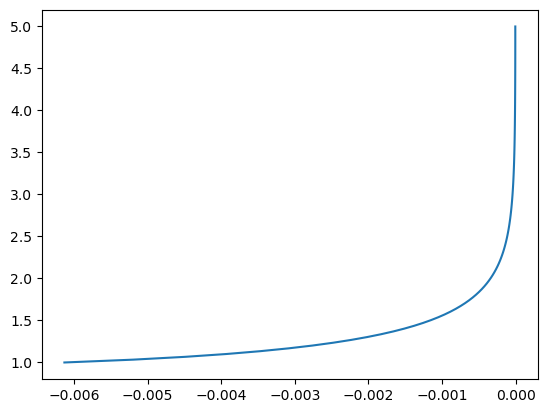

In [ ]:
plt.plot(np.sum(contributing_terms, axis=0)/S_hat**2, zg)

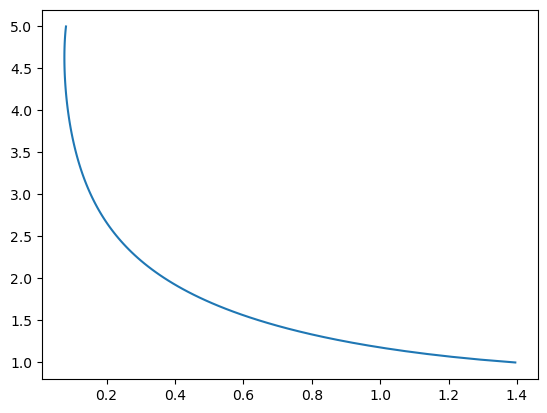

In [ ]:
plt.plot(np.abs(eta), zg)

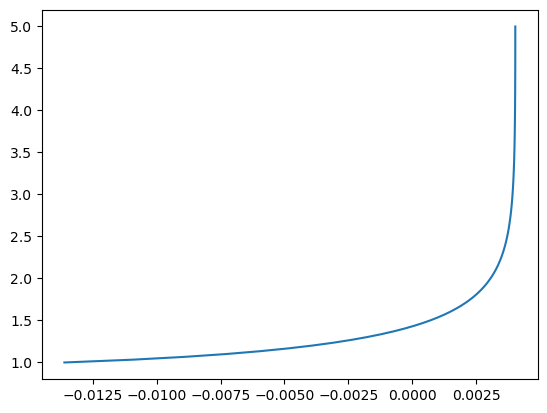

In [ ]:
plt.plot(gamma * (Delta_E/np.max(Delta_E) - vecced_delta[95] - vecced_delta[95] * kappa/S_hat**2 * np.sum(contributing_terms, axis=0)), zg)

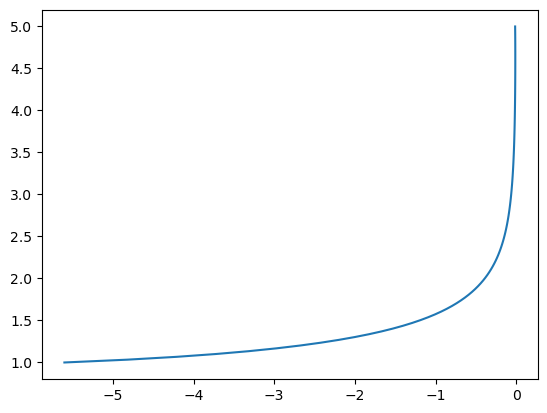

In [ ]:
plt.plot(dDelta_all[95], zg)

In [ ]:
dDelta_all = np.array([result[0] for result in res]) 

dDelta_projections = []
Delta_projections =[]
for i, result in enumerate(res):
    dDelta = result[0]
    eigenvalue = result[1]
    eigenvectors = result[2]
    #dDelta_projections.append(inner_product(dDelta, eigenvectors[:, 1], R, vecced_delta[i], zg))
    #Delta_projections.append(inner_product(vecced_delta[i], eigenvectors[:, 1], R, vecced_delta[i], zg))
    dDelta_projections.append(dDelta[N//2])
    Delta_projections.append(vecced_delta[i, N//2])


In [ ]:
zero_coords = []
for path in zero_contour.collections[0].get_paths():
    vertices = path.vertices
    zero_coords.append(vertices)

C:\Users\MikeTyrrell\AppData\Local\Temp\ipykernel_40340\702686078.py:2: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for path in zero_contour.collections[0].get_paths():


In [ ]:
Delta_at_0 = np.array([(delta, z_val) for delta, z_val in zip(zero_coords[0][:, 0], zg)])[:, 0]

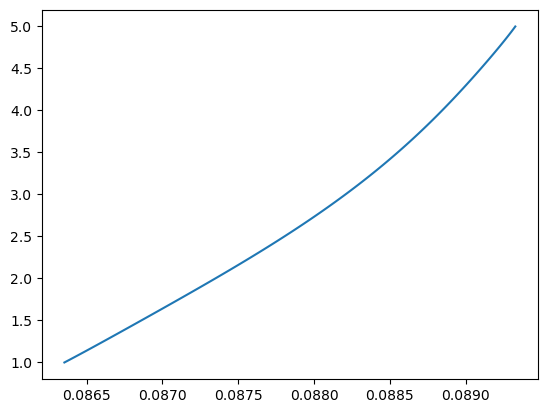

In [ ]:
plt.plot(dDelta_all[10, :], zg)